Tarea multistep

In [1]:
import pandas as pd
from numpy import array
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from numpy import hstack
from keras.layers.merge import concatenate

In [ ]:
pip install pandas

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [2]:
df=pd.read_csv("Daily_Demand_Forecasting_Orders.csv")

In [3]:
df.head()

,Week of the month (first week,second,third,fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)
0,1;4;316.307;223.270;61.543;175.586;302.448;0;6...,NaN,NaN,NaN
1,1;5;128.633;96.042;38.058;56.037;130.580;0;404...,NaN,NaN,NaN
2,1;6;43.651;84.375;21.826;25.125;82.461;1.386;1...,NaN,NaN,NaN
3,2;2;171.297;127.667;41.542;113.294;162.284;18....,NaN,NaN,NaN
4,2;3;90.532;113.526;37.679;56.618;116.220;6.459...,NaN,NaN,NaN


In [4]:
data = pd.DataFrame(df['Week of the month (first week'].str.split(';',13).tolist(),
                    columns = 
                    ['fourth','Day_of_the_week','Non-urgent-order',
                     'Urgent-order','OrderA','OrderB','OrderC','Fiscal','traffic-orders',
                     'Banking-orders-1','Banking-orders-2','Banking-orders-3','target'])

In [5]:
data.head()

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
0,1,4,316.307,223.270,61.543,175.586,302.448,0,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [6]:
data.isnull().any()

fourth              False
Day_of_the_week     False
Non-urgent-order    False
Urgent-order        False
OrderA              False
OrderB              False
OrderC              False
Fiscal              False
traffic-orders      False
Banking-orders-1    False
Banking-orders-2    False
Banking-orders-3    False
target              False
dtype: bool

In [7]:
data.isnull().sum()

fourth              0
Day_of_the_week     0
Non-urgent-order    0
Urgent-order        0
OrderA              0
OrderB              0
OrderC              0
Fiscal              0
traffic-orders      0
Banking-orders-1    0
Banking-orders-2    0
Banking-orders-3    0
target              0
dtype: int64

In [8]:
data.dtypes

fourth              object
Day_of_the_week     object
Non-urgent-order    object
Urgent-order        object
OrderA              object
OrderB              object
OrderC              object
Fiscal              object
traffic-orders      object
Banking-orders-1    object
Banking-orders-2    object
Banking-orders-3    object
target              object
dtype: object

In [9]:
data = data.astype(float)

In [10]:
data.dtypes

fourth              float64
Day_of_the_week     float64
Non-urgent-order    float64
Urgent-order        float64
OrderA              float64
OrderB              float64
OrderC              float64
Fiscal              float64
traffic-orders      float64
Banking-orders-1    float64
Banking-orders-2    float64
Banking-orders-3    float64
target              float64
dtype: object

In [11]:
data.head()

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
0,1.0,4.0,316.307,223.270,61.543,175.586,302.448,0.000,65556.0,44914.0,188411.0,14793.0,539.577
1,1.0,5.0,128.633,96.042,38.058,56.037,130.580,0.000,40419.0,21399.0,89461.0,7679.0,224.675
2,1.0,6.0,43.651,84.375,21.826,25.125,82.461,1.386,11992.0,3452.0,21305.0,14947.0,129.412
3,2.0,2.0,171.297,127.667,41.542,113.294,162.284,18.156,49971.0,33703.0,69054.0,18423.0,317.120
4,2.0,3.0,90.532,113.526,37.679,56.618,116.220,6.459,48534.0,19646.0,16411.0,20257.0,210.517


Data Set Information:

The database was collected during 60 days, this is a real database of a Brazilian company of large logistics.
Twelve predictive attributes and a target that is the total of orders for daily. treatment

*columns:
    
fourth or fifth week;
Day of the week (Monday to Friday);
Non-urgent order;
Urgent order;
Order type A;
Order type B;
Order type C;
Fiscal sector orders;
Orders from the traffic controller sector;
Banking orders (1);
Banking orders (2);
Banking orders (3);
Target (Total orders)

In [12]:
data.corr(method='spearman')

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
fourth,1.000000,-0.199278,0.305295,0.241157,0.330137,0.352502,-0.028597,-0.079508,-0.252482,0.336937,0.185186,-0.144296,0.305124
Day_of_the_week,-0.199278,1.000000,-0.420315,-0.579100,-0.117890,-0.400549,-0.513277,0.170226,-0.314024,-0.011089,-0.576349,0.088084,-0.454517
Non-urgent-order,0.305295,-0.420315,1.000000,0.479800,0.496749,0.801500,0.653626,-0.050380,0.109586,0.682356,0.732759,0.063851,0.865518
Urgent-order,0.241157,-0.579100,0.479800,1.000000,0.517422,0.580495,0.621506,-0.192920,0.117977,0.264296,0.560600,-0.061851,0.750320
OrderA,0.330137,-0.117890,0.496749,0.517422,1.000000,0.448902,0.202334,0.063674,-0.184107,0.585274,0.306696,0.069408,0.558099
OrderB,0.352502,-0.400549,0.801500,0.580495,0.448902,1.000000,0.410058,-0.000056,-0.041623,0.580661,0.741539,0.011892,0.892192
OrderC,-0.028597,-0.513277,0.653626,0.621506,0.202334,0.410058,1.000000,-0.129247,0.358488,0.278022,0.546430,0.024340,0.698972
Fiscal,-0.079508,0.170226,-0.050380,-0.192920,0.063674,-0.000056,-0.129247,1.000000,-0.055742,0.020498,-0.162089,0.391594,-0.018264
traffic-orders,-0.252482,-0.314024,0.109586,0.117977,-0.184107,-0.041623,0.358488,-0.055742,1.000000,-0.265907,0.125590,0.239066,0.046346
Banking-orders-1,0.336937,-0.011089,0.682356,0.264296,0.585274,0.580661,0.278022,0.020498,-0.265907,1.000000,0.247513,0.141706,0.588108


In [ ]:
#target con order B estan algo correlacionados

In [13]:
arrayX=data[['OrderB']]
#arrayX

In [14]:

from numpy import array
arrayX=array(arrayX)

In [15]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
   #out_end = end_ix + n_steps_output
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [16]:
arrayX.shape

(60, 1)

In [19]:
from sklearn.model_selection import train_test_split
n_steps=3

seq=arrayX
X,y=split_sequence(seq,n_steps)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)


In [20]:
n_features=1
x_train=X_train.reshape((X_train.shape[0],X_train.shape[1],n_features))

In [ ]:
#print(x_train)

In [21]:
x_test=X_test.reshape((X_test.shape[0],n_steps,n_features))

In [ ]:
#print(x_test)

In [22]:
from  keras.layers import LSTM
modeloV=Sequential()
modeloV.add(LSTM(50,activation='relu',input_shape=(n_steps,n_features)))
modeloV.add(Dense(1))
modeloV.compile(optimizer='adam',loss='mse')

In [23]:
history=modeloV.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=True)

Epoch 1/500
2/2 [==============================] - 0s 88ms/step - loss: 15194.8496 - val_loss: 20276.1191
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 14930.0303 - val_loss: 19948.4941
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 14668.8545 - val_loss: 19622.5801
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 14419.4834 - val_loss: 19300.1230
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 14155.8135 - val_loss: 18974.8301
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 13912.0000 - val_loss: 18647.7793
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 13668.6416 - val_loss: 18325.5801
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 13428.5635 - val_loss: 18014.1738
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 13185.4268 - val_loss: 17719.9023
Epoch 10/500
2/2 [==============================] - 

In [25]:
x_input=x_test[0]
x_input=x_input.reshape((1,n_steps,n_features))
y_pred=modeloV.predict(x_input,n_features)

In [26]:
y_pred

array([[107.84475]], dtype=float32)

In [28]:
y_test[0]

array([148.274])

In [31]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


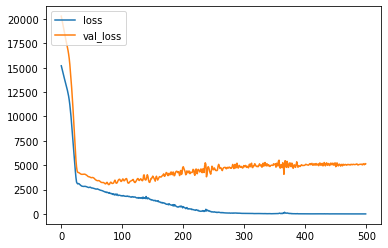

In [35]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

xc         = range(500)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper left')